In [1]:
import sys
sys.path.append('../../src')
from modules import *
from columns import *
sys.path.append('../../src/python')
from random_funks import *

In [2]:
pbt_score = pd.read_excel("../../data/VEGA_QSAR_modeli/PBT_results.xlsx", sheet_name="PBT_score", index_col=0)

In [3]:
PBT_score = pbt_score.drop(columns=['score_PBT'])

In [4]:
konc= pd.read_excel("../../data/VEGA_QSAR_modeli/concentration_results.xlsx", sheet_name="Concentration", index_col=0)

In [5]:
# Dodavanje P, B, T stupaca u konc DataFrame
for col in ['P', 'B', 'T']:
    konc[col] = PBT_score[col].values

In [6]:
# Sada kada svaka molekula ima pripadajuće P, B, T vrijednosti, pretvorimo to u 'long' format
konc_long = konc.reset_index().melt(id_vars=['index', 'P', 'B', 'T'], var_name='Lokacija', value_name='konc')

In [7]:
#konc_long['konc'].rank(method = 'first', ascending=False)
#konc_long['C']=konc_long['konc'].rank(method = 'min', ascending=False)

In [8]:
konc_long['C'] = konc_long['konc'].rank(ascending=False)

In [9]:
score_PBTC = konc_long[['P','B','T','C']].mean(axis=1)
konc_long['PBTC'] = score_PBTC

In [10]:
konc_long['PBTCr'] = konc_long['PBTC'].rank(ascending=False) # prvi rank dobije NAJMANJI PBTC 
konc_long

,index,P,B,T,Lokacija,konc,C,PBTC,PBTCr
0,Flu,23.833333,29.250,1.369048,Kuželj-Gorski kotar - Kupa,3.34,173.0,56.863095,812.0
1,Pir,23.833333,30.000,3.797619,Kuželj-Gorski kotar - Kupa,3.78,163.0,55.157738,815.0
2,BaA,23.833333,33.250,8.464286,Kuželj-Gorski kotar - Kupa,0.49,315.0,95.136905,655.0
3,Kri,23.833333,33.250,6.547619,Kuželj-Gorski kotar - Kupa,2.29,207.5,67.782738,765.0
4,BjF,18.500000,24.500,6.964286,Kuželj-Gorski kotar - Kupa,1.25,259.0,77.241071,727.0
...,...,...,...,...,...,...,...,...,...
975,PCB-167,13.000000,10.750,30.452381,Karlovac-Foginovo kupalište - Korana,0.02,756.5,202.675595,189.0
976,PCB-156,13.500000,10.750,29.428571,Karlovac-Foginovo kupalište - Korana,0.02,756.5,202.544643,213.5
977,PCB-157,13.166667,11.000,30.750000,Karlovac-Foginovo kupalište - Korana,0.02,756.5,202.854167,153.5
978,PCB-170,12.500000,16.375,32.785714,Karlovac-Foginovo kupalište - Korana,0.02,756.5,204.540179,63.5


In [11]:
prvi_po_rangu = konc_long[konc_long['PBTCr'] == 1]
prvi_po_rangu

,index,P,B,T,Lokacija,konc,C,PBTC,PBTCr
339,PCB-180,18.25,15.125,33.25,Jurovo - Jurovski Brod (utok Lahinje - lijevi ...,0.01,976.5,260.78125,1.0


In [12]:
# Pretvaranje konc_long DataFrame-a natrag u matricu dimenzija 35x28 za PBTC ocjene
PBTCr_matrix = konc_long.pivot(index='index', columns='Lokacija', values='PBTCr')
PBTCr_matrix

Lokacija,Istra - Boljunčica,Istra - Mala Huba,Istra - Mirna,Belavići-kamp Slapić - Mrežnica,Duga Resa-gradsko kupalište - Mrežnica,Iševnica- Gorski kotar - Kupica,Jurovo - Jurovski Brod (utok Lahinje - lijevi pritok) - Kupa,Karlovac-Foginovo kupalište - Korana,Kuželj-Gorski kotar - Kupa,Metković-Doljani - Neretva,...,Sisak (Stari grad) - Kupa,Sisak (Stari grad) - Sava,Slunj-kupalište Rastoke - Korana,Striježevica - Brzaja,Stubičke Toplice - Vidak,Zagreb (Savski Kamenji - toplana) - Sava,Zagrebačka županija - Kupčina,centar Karlovca - Kupa,ušće - Neretva,ušće u Kupu - Korana
index,,,,,,,,,,,,,,,,,,,,,
BaA,778.0,760.0,678.0,694.0,878.0,645.0,735.0,821.0,655.0,868.0,...,876.0,801.0,716.0,666.0,740.0,954.0,725.0,887.0,570.0,854.0
BaP,790.0,826.0,688.0,734.0,917.0,672.0,794.0,846.0,714.0,902.0,...,919.0,814.0,756.0,637.5,793.0,968.0,772.0,936.0,617.0,859.0
BbF,958.0,978.0,903.0,935.0,972.0,937.0,946.0,894.0,867.0,964.0,...,980.0,962.0,896.0,684.0,910.0,977.0,809.0,974.0,710.0,926.0
BghiP,883.0,864.0,780.0,783.0,916.0,844.0,842.0,832.0,767.0,904.0,...,908.0,841.0,813.0,660.0,848.0,957.0,771.0,884.0,634.0,818.0
BjF,762.0,819.0,741.5,726.0,886.0,670.0,741.5,807.0,727.0,879.0,...,885.0,834.0,720.0,632.0,823.0,941.0,730.0,895.0,673.0,736.0
BkF,724.0,770.0,687.0,697.0,850.0,699.0,711.0,784.0,663.0,839.0,...,853.0,777.0,675.0,557.0,787.0,942.0,703.0,881.0,531.0,788.0
DDD,132.0,132.0,132.0,478.0,473.0,132.0,516.5,559.0,132.0,132.0,...,574.0,607.5,478.0,132.0,132.0,623.0,132.0,607.5,132.0,132.0
DDE,614.5,707.0,652.0,268.5,534.0,603.0,630.0,545.5,510.0,545.5,...,633.0,562.5,562.5,268.5,471.0,614.5,268.5,568.5,268.5,268.5
DDT,235.0,235.0,235.0,235.0,235.0,235.0,679.0,235.0,235.0,235.0,...,754.0,585.0,235.0,469.0,235.0,751.0,235.0,235.0,235.0,554.0


In [13]:
with pd.ExcelWriter("../../data/VEGA_QSAR_modeli/PBTC_results.xlsx") as writer:
    konc_long.to_excel(writer, sheet_name="PBTC_score")
    PBTCr_matrix.to_excel(writer, sheet_name="PBTC")


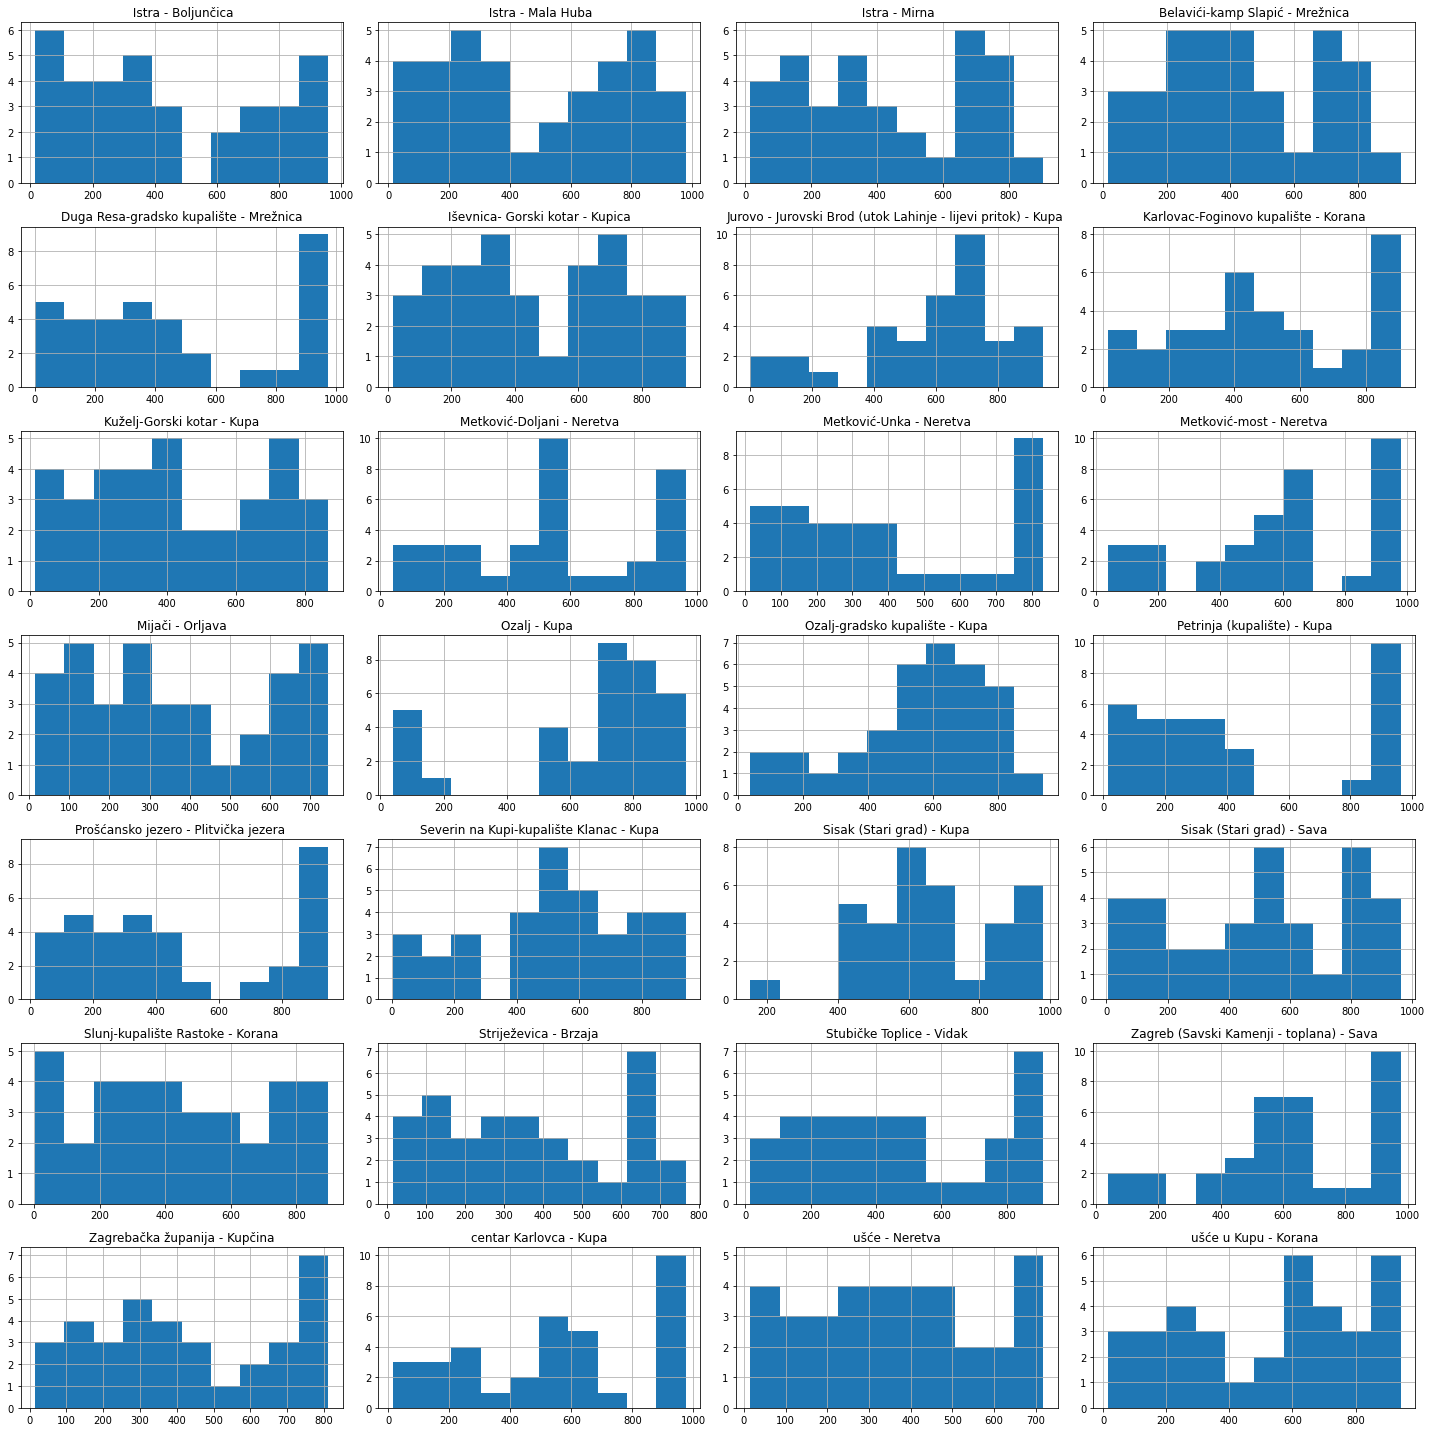

In [14]:
# Kreiranje matrice podgrafikona
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 20))

# Iscrtavanje histograma za svaku kolonu
for i, column in enumerate(PBTCr_matrix.columns):
    ax = axes[i // 4, i % 4]  # Određuje poziciju podgrafikona
    PBTCr_matrix[column].hist(ax=ax)
    ax.set_title(column)

# Sakrijte sve prazne podgrafikone
for i in range(len(PBTCr_matrix.columns), 28):
    axes[i // 4, i % 4].axis('off')

plt.tight_layout()

# Spremanje grafikona
#plt.savefig('../../data/VEGA_QSAR_modeli/histogram_novo.jpg', format='jpg', dpi=1000)
#plt.savefig('../../data/VEGA_QSAR_modeli/histogram_novo.svg', format='svg')

# Pokažite graf u vašem Jupyter bilježnici ili Python skripti
plt.show()

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Postavljanje veličine fonta
axis_fontsize = 60  # Za oznake osi
title_fontsize = 70  # Za naslove
tick_fontsize = 50 # Za oznake tick

# Kreiranje matrice podgrafikona
num_columns = len(PBTCr_matrix.columns)
num_rows = np.ceil(num_columns / 2).astype(int)

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(60, 30 * num_rows // 2))



for i, column in enumerate(PBTCr_matrix.columns):
    ax = axes.flatten()[i]
    PBTCr_matrix[column].hist(ax=ax, bins=10)
    ax.set_title(column, fontsize=title_fontsize)  # Primjena veličine fonta na naslov
    ax.set_xlabel('PBTC', fontsize=axis_fontsize)  # Primjena veličine fonta na oznaku x-osi
    ax.set_ylabel('Frekvencija', fontsize=axis_fontsize)  # Primjena veličine fonta na oznaku y-osi
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)  # Prilagodba veličine fonta oznaka tick

# Sakrijte sve prazne podgrafikone
for i in range(num_columns, num_rows * 2):
    axes.flatten()[i].axis('off')

plt.subplots_adjust(wspace=3)  # Prilagodite vrijednost po želji
plt.tight_layout()

# Spremanje grafikona
plt.savefig('../../data/VEGA_QSAR_modeli/histogram_PBTC.svg', format='svg')

# Pokažite graf
plt.show()


In [16]:
def top_molecules_per_location(df, top_n=10):
    # Kreiramo prazan dictionary za rezultate
    top_molecules_df = pd.DataFrame()
    for column in df.columns:
        top_molecules_df[column] = df[column].sort_values(ascending=False).head(top_n).index
    return top_molecules_df    

In [17]:
top_10_molecules = top_molecules_per_location(PBTCr_matrix)

In [18]:
top_10_molecules

,Istra - Boljunčica,Istra - Mala Huba,Istra - Mirna,Belavići-kamp Slapić - Mrežnica,Duga Resa-gradsko kupalište - Mrežnica,Iševnica- Gorski kotar - Kupica,Jurovo - Jurovski Brod (utok Lahinje - lijevi pritok) - Kupa,Karlovac-Foginovo kupalište - Korana,Kuželj-Gorski kotar - Kupa,Metković-Doljani - Neretva,...,Sisak (Stari grad) - Kupa,Sisak (Stari grad) - Sava,Slunj-kupalište Rastoke - Korana,Striježevica - Brzaja,Stubičke Toplice - Vidak,Zagreb (Savski Kamenji - toplana) - Sava,Zagrebačka županija - Kupčina,centar Karlovca - Kupa,ušće - Neretva,ušće u Kupu - Korana
0,BbF,BbF,BbF,BbF,BbF,BbF,BbF,Flu,BbF,BbF,...,BbF,BbF,BbF,Pir,Pir,BbF,Pir,BbF,Pir,Kri
1,BghiP,Pir,Flu,IP,Flu,Kri,Pir,BbF,Pir,Flu,...,Flu,Pir,Pir,Flu,Flu,Flu,BbF,Flu,Flu,BbF
2,Flu,Flu,BghiP,Flu,Pir,Pir,Kri,Pir,Flu,IP,...,Pir,Flu,BghiP,BbF,BbF,Pir,Flu,BaP,BbF,Flu
3,Pir,BghiP,Pir,Pir,IP,BghiP,Flu,Kri,IP,Pir,...,IP,IP,Flu,Kri,IP,IP,IP,Pir,BjF,Pir
4,IP,IP,IP,BghiP,BaP,Flu,BghiP,IP,BghiP,BghiP,...,BaP,BghiP,IP,BaA,BghiP,BaP,BaP,Kri,IP,BaP
5,Kri,BaP,BjF,Kri,BghiP,IP,IP,BaP,Kri,BaP,...,BghiP,BjF,Kri,BghiP,Kri,Kri,BghiP,IP,BghiP,BaA
6,BaP,Kri,DahA,BaP,Kri,DahA,BaP,BghiP,BjF,Kri,...,BjF,BaP,BaP,IP,BjF,BghiP,Kri,BjF,BaP,IP
7,BaA,BjF,Kri,BjF,BjF,BkF,BjF,BaA,BaP,BjF,...,Kri,Kri,BjF,BaP,BaP,BaA,BjF,BaA,BaA,BghiP
8,BjF,BkF,BaP,BkF,BaA,PCB-28,BaA,BjF,BkF,BaA,...,BaA,BaA,BaA,BjF,BkF,BkF,BaA,BghiP,BkF,BkF
9,DahA,BaA,BkF,BaA,BkF,BaP,PCB-28,BkF,BaA,BkF,...,BkF,BkF,BkF,BkF,BaA,BjF,BkF,BkF,γ-HCH,BjF


In [19]:
# Brojimo koliko se puta svaki spoj (molekula) pojavljuje u top 10 za sve lokacije
molecule_counts = top_10_molecules.apply(pd.Series.value_counts).fillna(0).sum(axis=1).astype(int)

# Stvaramo DataFrame za prikaz rezultata
molecule_frequency_df = pd.DataFrame(molecule_counts, columns=['Frequency']).sort_values(by='Frequency', ascending=False)

molecule_frequency_df

,Frequency
BaP,28
BbF,28
BghiP,28
Flu,28
IP,28
Pir,28
Kri,27
BjF,26
BaA,25
BkF,25


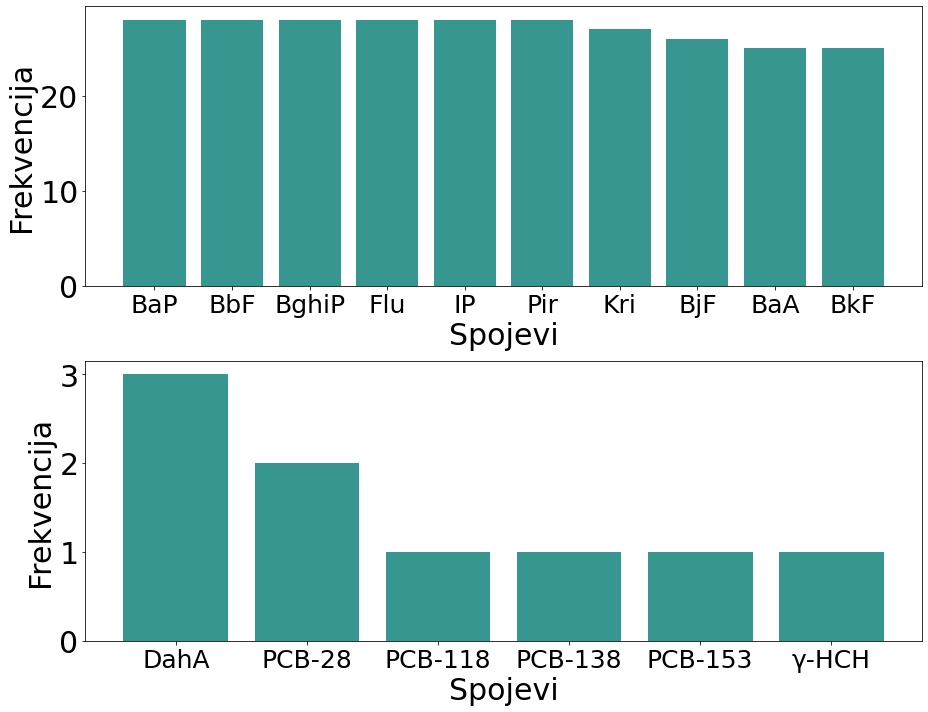

In [26]:
# Postavljanje veličine fonta
axis_fontsize = 30  # Za oznake osi
tick_fontsize = 25  # Za oznake tick

# Crtanje histograma podijeljenog na dva podgrafa
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 10))  # Dva podgrafa, jedan iznad drugog

# Prvi podgraf (gornji) za prvih 10 molekula
axes[0].bar(molecule_frequency_df.index[:10], molecule_frequency_df['Frequency'][:10], color='#389691')
axes[0].set_xlabel('Spojevi', fontsize=axis_fontsize)
axes[0].set_ylabel('Frekvencija', fontsize=axis_fontsize)
axes[0].tick_params(axis='x', labelsize=tick_fontsize)
axes[0].tick_params(axis='y', labelsize=axis_fontsize)

# Drugi podgraf (donji) za preostale molekule
axes[1].bar(molecule_frequency_df.index[10:], molecule_frequency_df['Frequency'][10:], color='#389691')
axes[1].set_xlabel('Spojevi', fontsize=axis_fontsize)
axes[1].set_ylabel('Frekvencija', fontsize=axis_fontsize)
axes[1].tick_params(axis='x', labelsize=tick_fontsize)
axes[1].tick_params(axis='y', labelsize=axis_fontsize)
            

plt.tight_layout()  # Poboljšava raspored kako bi se izbjeglo preklapanje


plt.savefig('../../data/VEGA_QSAR_modeli/histogram_top10.svg', format='svg')

plt.show()  # Prikazuje grafikon

AttributeError: Text.set() got an unexpected keyword argument 'labelsize'

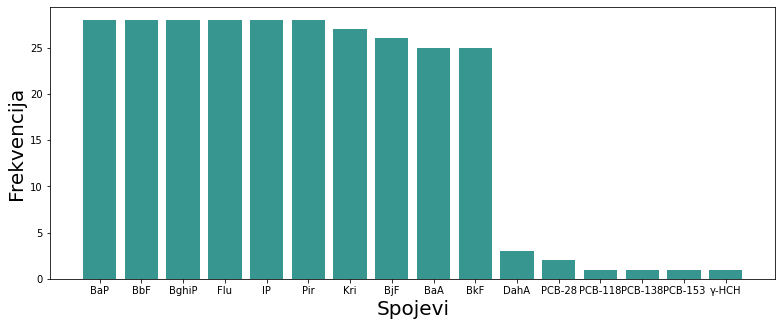

In [20]:
axis_fontsize = 20  # Za oznake osi
tick_fontsize = 50 # Za oznake tick

# Crtanje histograma
plt.figure(figsize=(13, 5))  # Veličina figure
plt.bar(molecule_frequency_df.index, molecule_frequency_df['Frequency'], color='#389691')  # Stvaranje stupčastog grafikona
plt.xlabel('Spojevi', fontsize=axis_fontsize)  # Oznaka x-osi
plt.ylabel('Frekvencija', fontsize=axis_fontsize)  # Oznaka y-osi
plt.xticks(rotation=0, labelsize=tick_fontsize)  # Rotacija naziva spojeva na x-osi za bolju čitljivost
#plt.title('Histogram frekvencije spojeva')  # Naslov grafikona
plt.tight_layout()  # Poboljšava raspored kako bi se izbjeglo preklapanje


plt.savefig('../../data/VEGA_QSAR_modeli/histogram_PBTC.svg', format='svg')

plt.show()  # Prikazuje grafikon


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Postavljanje veličine fonta
axis_fontsize = 20  # Za oznake osi
tick_fontsize = 17  # Za oznake tick

# Crtanje histograma
plt.figure(figsize=(20, 5))  # Veličina figure
plt.bar(molecule_frequency_df.index, molecule_frequency_df['Frequency'], color='#389691')  # Stvaranje stupčastog grafikona
plt.xlabel('Spojevi', fontsize=axis_fontsize)  # Oznaka x-osi
plt.ylabel('Frekvencija', fontsize=axis_fontsize)  # Oznaka y-osi

# Postavljanje veličine fonta za oznake na x i y osi
plt.tick_params(axis='x', labelsize=tick_fontsize, rotation=0)  # Prilagodba veličine fonta i rotacije za oznake na x osi
plt.tick_params(axis='y', labelsize=tick_fontsize)  # Prilagodba veličine fonta za oznake na y osi

plt.tight_layout()  # Poboljšava raspored kako bi se izbjeglo preklapanje

plt.savefig('../../data/VEGA_QSAR_modeli/histogram_PBTC.svg', format='svg')

plt.show()  # Prikazuje grafikon


In [ ]:
# Prvo dobijamo maksimalne vrijednosti za svaku lokaciju
max_values = PBTCr_matrix.max()

# Zatim dobijamo indekse (molekule) koji odgovaraju tim maksimalnim vrijednostima
max_molecules = PBTCr_matrix.idxmax()

# Spajamo ove informacije u jedan DataFrame
max_molecules_df = pd.DataFrame({'Molecule': max_molecules, 'Max_Value': max_values})

max_molecules_df
